# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
from glob import glob
import math
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/data'

디즈니	아마존	파라마운트  넷플릭스


In [4]:
data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/processed_data4'
save_data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/processed_data5'
platform_names = ["amazon", "netflix", "disney", "paramount"]

credits_path = os.path.join(data_dir, "merged_credits.csv")
amazon_titles_path = os.path.join(data_dir, "merged_titles.csv")

In [5]:
credits = pd.read_csv(credits_path)
titles = pd.read_csv(amazon_titles_path)

## 다수의 파라미터에 대한 시각화

## TMDB 점수 기준 시각화

### TMDB 점수 기준 최상위권 작품

In [6]:
titles.columns[:20]

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'platform', 'KW', 'DZ', 'FJ', 'SA', 'LI'],
      dtype='object')

In [7]:
titles["tmdb_popularity"].describe()

count    17377.000000
mean        15.796450
std         97.827574
min          0.000153
25%          1.743000
50%          3.915000
75%         10.430000
max       9323.832000
Name: tmdb_popularity, dtype: float64

In [8]:
titles["imdb_votes"].describe()

count    1.737700e+04
mean     1.961688e+04
std      8.895046e+04
min      5.000000e+00
25%      1.940000e+02
50%      9.000000e+02
75%      4.980000e+03
max      2.268288e+06
Name: imdb_votes, dtype: float64

### 최상위권 영화
- imdb 투표수가 5천표 이상인 작품 중
- 최상위권 영화 500위의 플랫폼 비율
- 최상위권 영화 500위의 장르 비율
- 최상위권 영화 500위의 국가 비율
- 적절한 연령, 런타임 등
- 잘나가는 감독 및 배우


#### 플랫폼 비율

In [9]:
rank_threshold = 500

titles_columns = list(titles.columns)
id_index = titles_columns.index("id")

# 영화만 분리 후 tmdb_popularity 내림차순 정렬
movie_titles = titles.loc[titles["type"] == "MOVIE"]
movie_titles = movie_titles.loc[movie_titles["imdb_votes"] >= 5000]
movie_tmdb_popularity_sorted_titles = movie_titles.sort_values("tmdb_popularity", ascending=False)
top_rank_movie_id_list = movie_tmdb_popularity_sorted_titles.iloc[:rank_threshold, :]

In [10]:
top_rank_movie_id_list.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,KW,DZ,FJ,...,history,animation,horror,documentation,european,western,scifi,drama,comedy,none_genre
count,500.00000,500.00000,0.0,500.000000,5.000000e+02,500.000000,500.000000,500.0,500.0,500.0,...,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,2011.99600,110.01800,NaN,6.586000,2.515107e+05,140.585892,6.876000,0.0,0.0,0.0,...,0.030000,0.244000,0.16200,0.024000,0.068000,0.018000,0.264000,0.456000,0.412000,0.0
std,13.32122,22.32466,NaN,1.083639,3.435998e+05,223.106947,0.782642,0.0,0.0,0.0,...,0.170758,0.429923,0.36882,0.153202,0.251998,0.133084,0.441241,0.498559,0.492688,0.0
min,1937.00000,2.00000,NaN,2.500000,5.021000e+03,44.845000,4.200000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2009.00000,94.00000,NaN,5.900000,2.667775e+04,57.969250,6.400000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2016.00000,107.00000,NaN,6.700000,1.268870e+05,78.561000,6.900000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2021.00000,121.00000,NaN,7.300000,3.209740e+05,122.313500,7.400000,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
max,2022.00000,195.00000,NaN,9.200000,2.268288e+06,2331.811000,8.700000,0.0,0.0,0.0,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


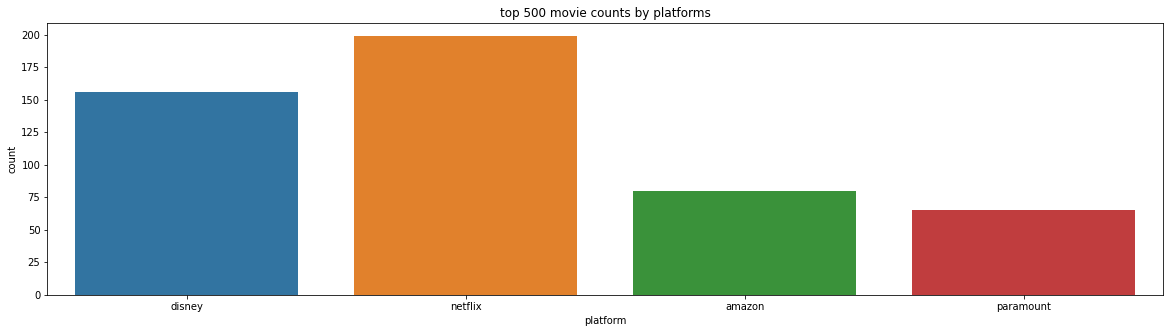

In [11]:
plt.figure(figsize=(20, 5))
sns.countplot(x="platform", data=top_rank_movie_id_list)
plt.title("top 500 movie counts by platforms")
plt.show()

([<matplotlib.patches.Wedge at 0x7f546e0462d0>,
 [Text(0.3464851653650353, 1.0440057615655023, 'netflix'),
  Text(-1.0372895776908981, -0.3661015323838977, 'disney'),
  Text(0.2735589197730255, -1.065441465972024, 'amazon'),
  Text(1.009530094796705, -0.43686266457521394, 'paramount')],
 [Text(0.18899190838092836, 0.5694576881266376, '39.8%'),
  Text(-0.5657943151041263, -0.19969174493667144, '31.2%'),
  Text(0.14921395623983208, -0.5811498905301948, '16.0%'),
  Text(0.5506527789800209, -0.23828872613193486, '13.0%')])

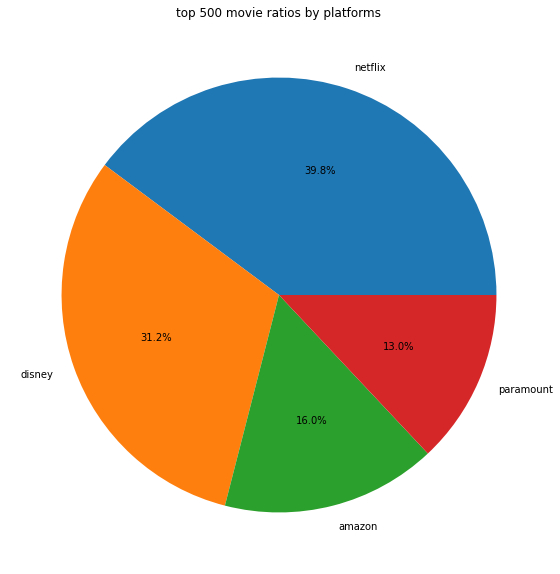

In [12]:
labels = top_rank_movie_id_list["platform"].value_counts().index.tolist()
data = top_rank_movie_id_list["platform"].value_counts().tolist()

plt.figure(figsize=(20, 10))
plt.title("top 500 movie ratios by platforms")
plt.pie(data, labels=labels , autopct='%.1f%%')

- 최상위권 영화를 영화 개수가 낮은 디즈니와 넷플릭스에서 점유하고 있음.
- 양보다는 질로 승부한다!

#### 장르 비율

In [13]:
titles_columns = titles.columns
titles_columns[156:176]

Index(['family', 'war', 'fantasy', 'romance', 'sport', 'action', 'music',
       'thriller', 'reality', 'crime', 'history', 'animation', 'horror',
       'documentation', 'european', 'western', 'scifi', 'drama', 'comedy',
       'none_genre'],
      dtype='object')

In [14]:
def make_data_labels(titles):
    # 데이터 프레임 값 생성
    genre_counts = titles.iloc[:, 156:176]
    genre_data = list(genre_counts.sum())
    genre_names = genre_counts.sum().index.tolist()

    # 데이터 정렬
    index = np.argsort(np.array(genre_data))
    data = []
    labels = []
    for i in index:
        data.append(genre_data[i])
        labels.append(genre_names[i])

    return data, labels

- 플랫폼 상관없이 장르 나눠보기
- 플랫폼 별 장르 나눠보기
- 최대 12개까지 확인

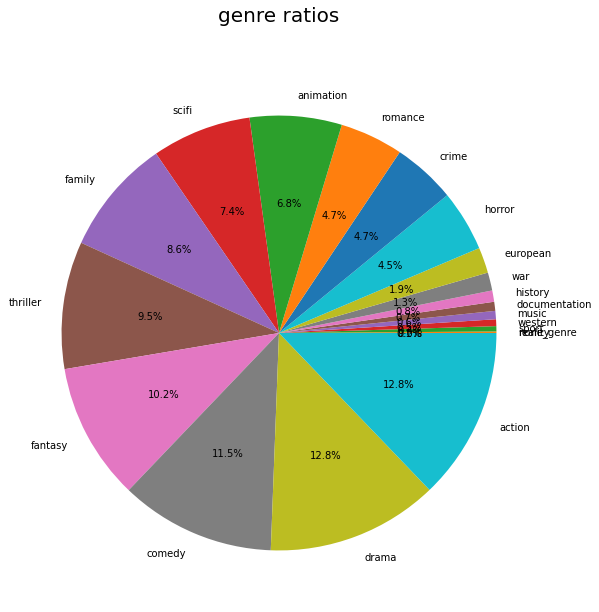

In [42]:
# 장르가 너무 많아서 상위 12개국만 봄
top_rank = 20

plt.figure(figsize=(10, 10))
data, labels = make_data_labels(top_rank_movie_id_list)

plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
plt.title("genre ratios", fontsize=20, pad=40)

plt.show()

- 플랫폼 통합 기준으로 장르 분포

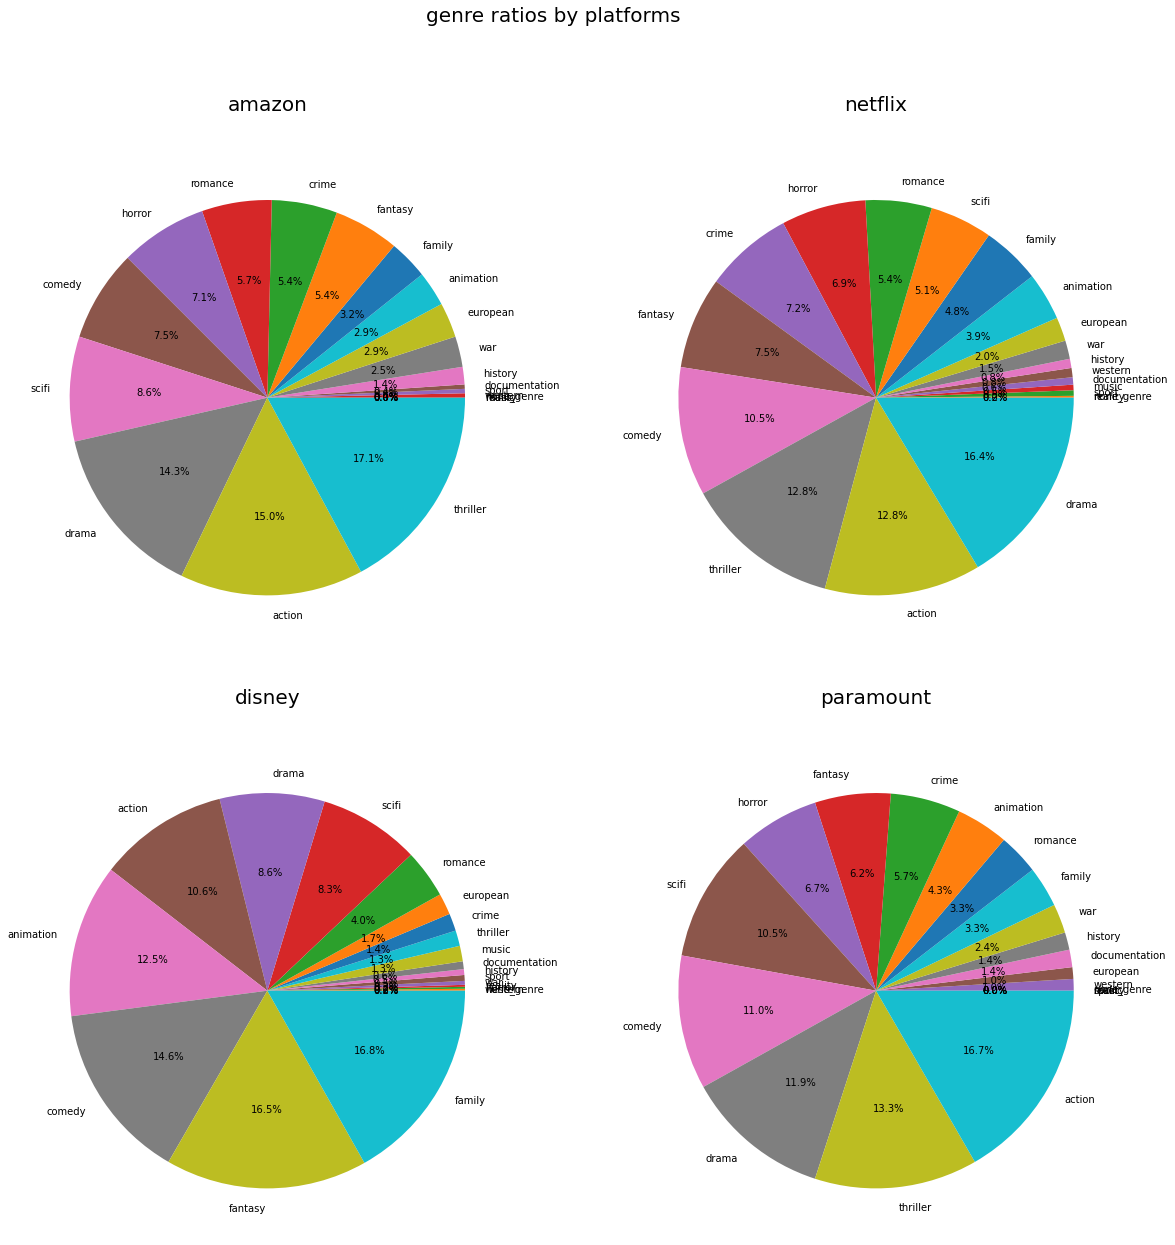

In [43]:
# 장르가 너무 많아서 상위 12개국만 봄
top_rank = 20

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]
    data, labels = make_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('genre ratios by platforms',fontsize=20)
plt.show()

- 샘플 수가 적어서 그렇겠지만 플랫폼 별 선호 장르가 극명하게 드러남.

#### 국가 비율

In [17]:
titles.columns[15:156]

Index(['KW', 'DZ', 'FJ', 'SA', 'LI', 'SN', 'LB', 'CR', 'BS', 'BR',
       ...
       'BE', 'JP', 'KG', 'MT', 'PA', 'IS', 'CZ', 'IL', 'CY', 'none_country'],
      dtype='object', length=141)

In [18]:
def make_country_data_labels(titles):
    # 데이터 프레임 값 생성
    country_counts = titles.iloc[:, 15:156]
    country_data = list(country_counts.sum())
    country_names = country_counts.sum().index.tolist()

    # 데이터 정렬
    index = np.argsort(np.array(country_data))[::-1]
    data = []
    labels = []
    for i in index:
        data.append(country_data[i])
        labels.append(country_names[i])

    return data, labels

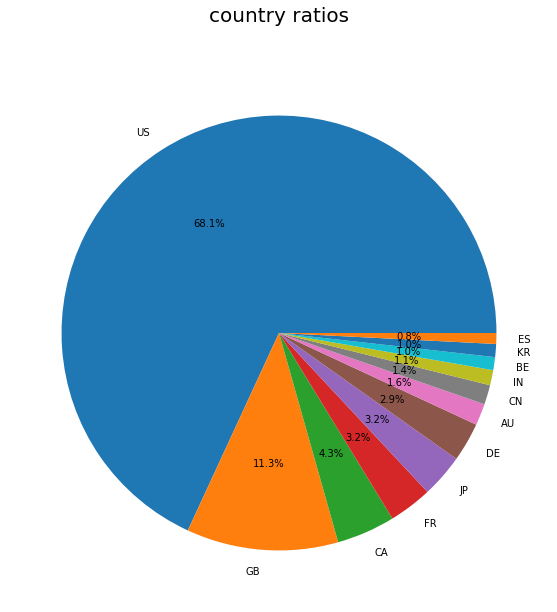

In [19]:
# 나라가 너무 많아서 상위 12개국만 봄
top_rank = 12

plt.figure(figsize=(10, 10))
data, labels = make_country_data_labels(top_rank_movie_id_list)

plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
plt.title("country ratios", fontsize=20, pad=40)

plt.show()

- 전체 플랫폼에 대한 국가 비율

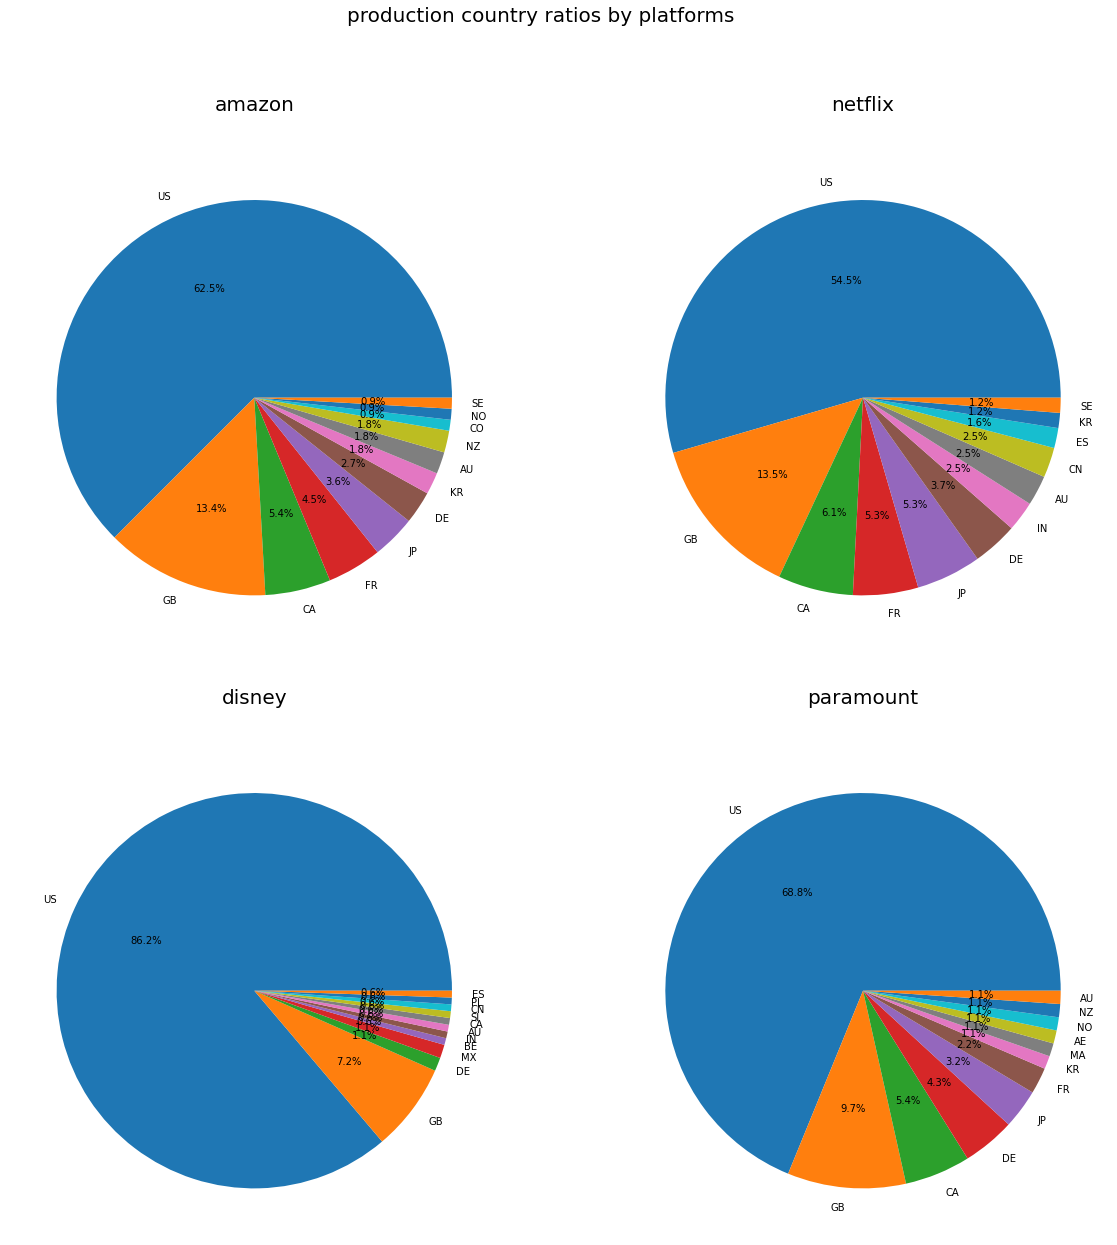

In [20]:
# 나라가 너무 많아서 상위 12개국만 봄
top_rank = 12

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]
    data, labels = make_country_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('production country ratios by platforms',fontsize=20)
plt.show()

# 연령 제한

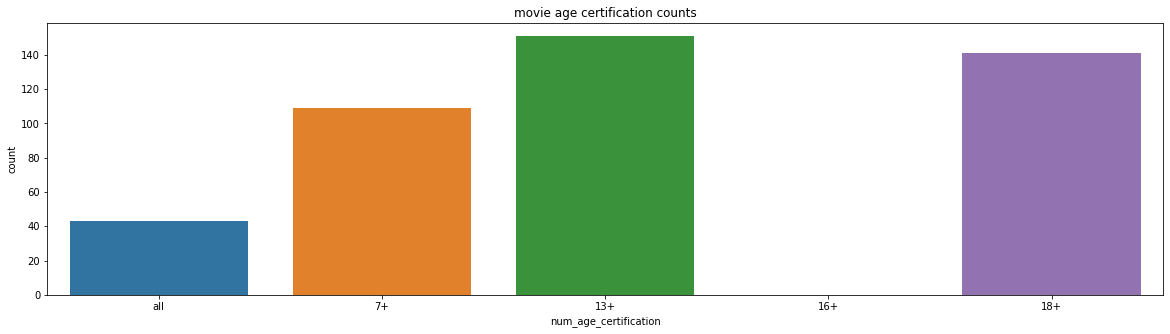

In [21]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 5))
data = top_rank_movie_id_list

plt.title("movie age certification counts")
sns.countplot(x="num_age_certification", data=data, order=order)

plt.show()

- 전체 플랫폼

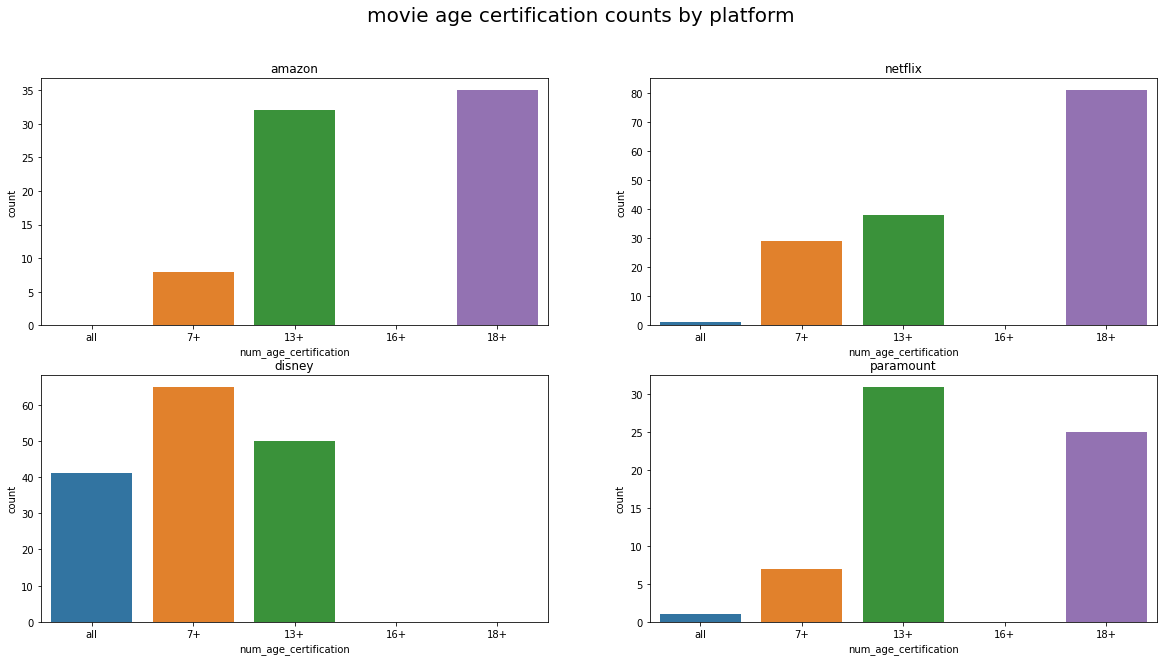

In [22]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('movie age certification counts by platform',fontsize=20)
plt.show()

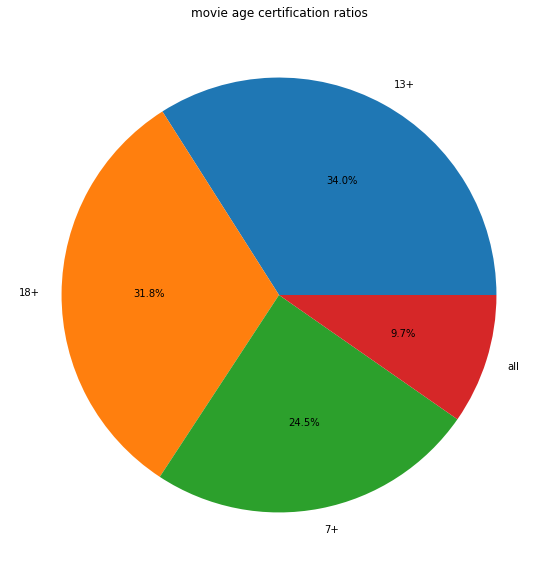

In [23]:
plt.figure(figsize=(10, 10))
data = top_rank_movie_id_list
data = data.loc[data["num_age_certification"] != "none"]
labels = data["num_age_certification"].value_counts().index.tolist()
data = data["num_age_certification"].value_counts()

plt.title("movie age certification ratios")
plt.pie(data, labels=labels, autopct='%.1f%%')

plt.show()

- 전체

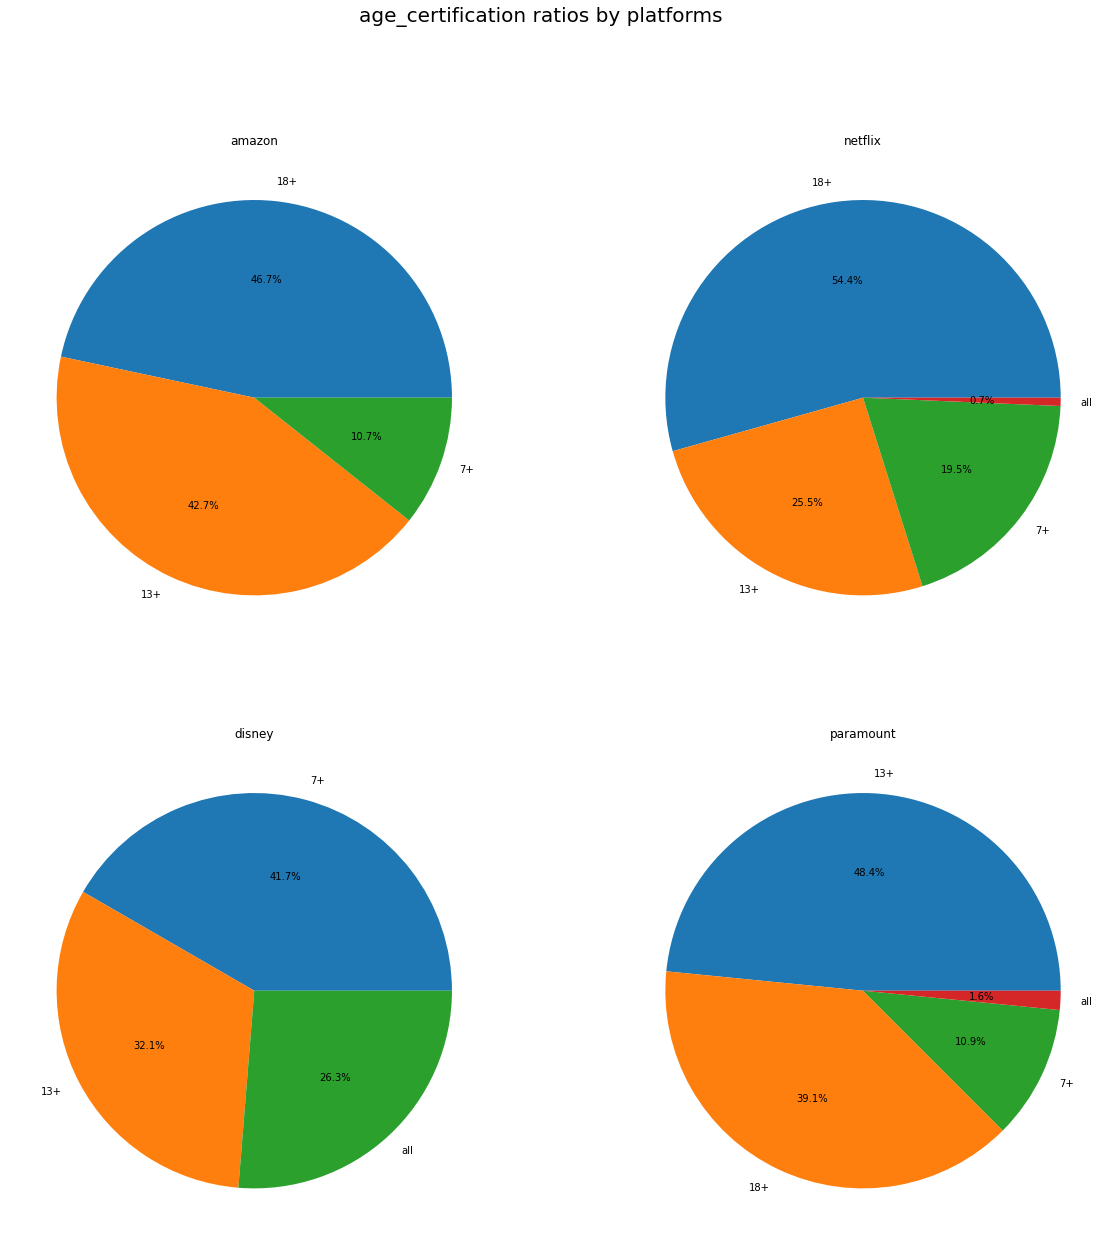

In [24]:
plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]
    data = data.loc[data["num_age_certification"] != "none"]
    labels = data["num_age_certification"].value_counts().index.tolist()
    data = data["num_age_certification"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('age_certification ratios by platforms',fontsize=20)
plt.show()

#### 상영 시간

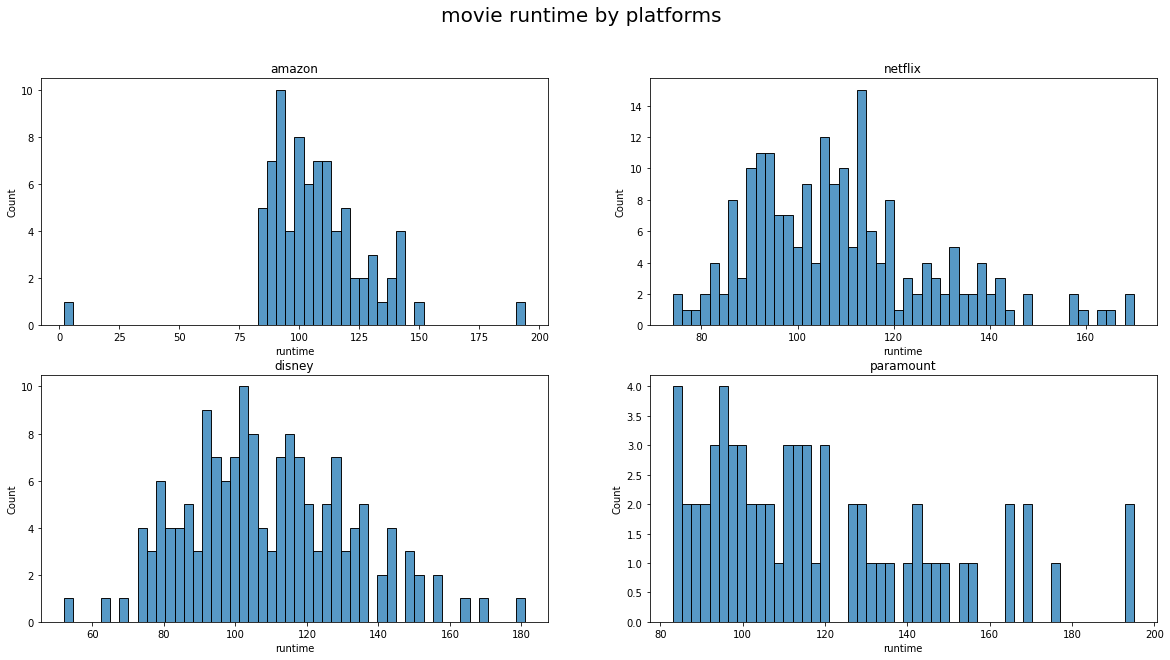

In [25]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=50, kde=False, data=data)

plt.suptitle('movie runtime by platforms',fontsize=20)
plt.show()

- 샘플 수가 너무 적어 보인다.

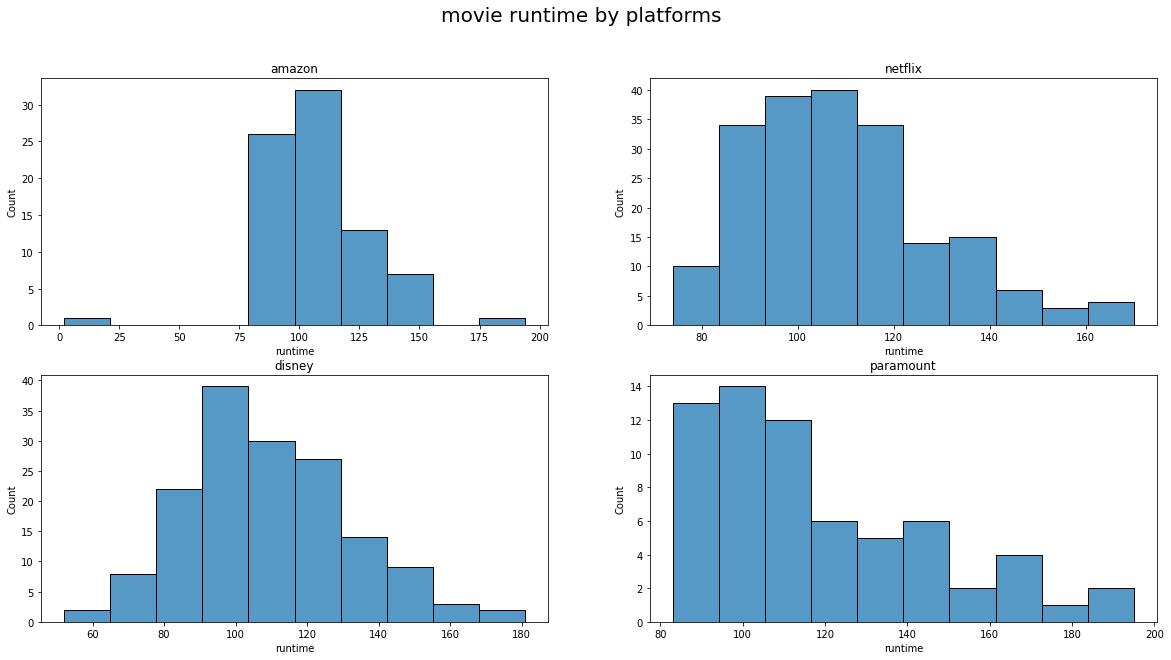

In [26]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_movie_id_list.loc[top_rank_movie_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=10, kde=False, data=data)

plt.suptitle('movie runtime by platforms',fontsize=20)
plt.show()

### 최상위권 드라마

In [27]:
rank_threshold = 500

titles_columns = list(titles.columns)
id_index = titles_columns.index("id")

# 영화만 분리 후 tmdb_popularity 내림차순 정렬
show_titles = titles.loc[titles["type"] == "SHOW"]
show_titles = show_titles.loc[show_titles["imdb_votes"] >= 5000]
show_tmdb_popularity_sorted_titles = show_titles.sort_values("tmdb_popularity", ascending=False)
top_rank_show_id_list = show_tmdb_popularity_sorted_titles.iloc[:rank_threshold, :]

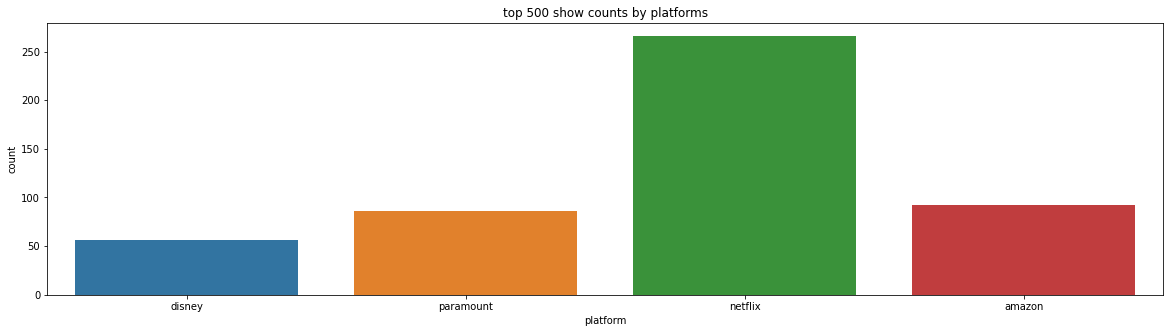

In [28]:
plt.figure(figsize=(20, 5))
sns.countplot(x="platform", data=top_rank_show_id_list)
plt.title("top 500 show counts by platforms")
plt.show()

([<matplotlib.patches.Wedge at 0x7f546d3131d0>,
 [Text(-0.110397904370958, 1.0944461168602595, 'netflix'),
  Text(-0.7826892185891637, -0.7729149934528923, 'amazon'),
  Text(0.35303802658144867, -1.0418081165874435, 'paramount'),
  Text(1.0326072747964659, -0.37910713002714164, 'disney')],
 [Text(-0.06021703874779527, 0.5969706091965051, '53.2%'),
  Text(-0.4269213919577256, -0.42158999642885026, '18.4%'),
  Text(0.1925661963171538, -0.5682589726840601, '17.2%'),
  Text(0.5632403317071631, -0.2067857072875318, '11.2%')])

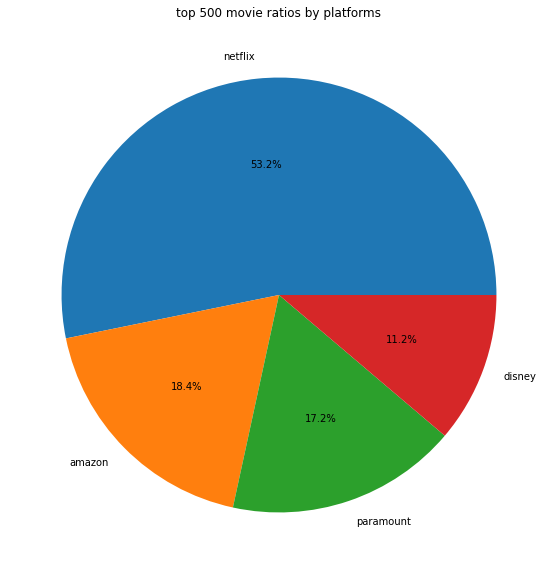

In [29]:
labels = top_rank_show_id_list["platform"].value_counts().index.tolist()
data = top_rank_show_id_list["platform"].value_counts().tolist()

plt.figure(figsize=(20, 10))
plt.title("top 500 movie ratios by platforms")
plt.pie(data, labels=labels , autopct='%.1f%%')

- 드라마 역시 넷플릭스가 압도적임. 역시 넷플릭스 오리지널!
- 디즈니는 드라마에서 약세

# 장르 비율

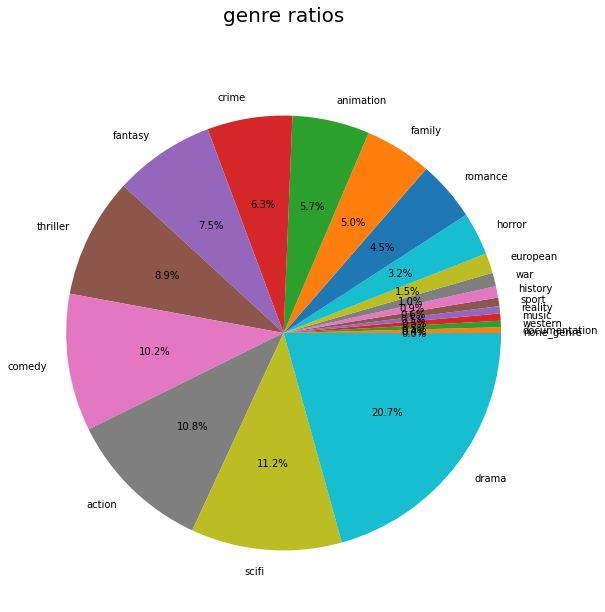

In [44]:
# 장르가 너무 많아서 상위 12개국만 봄
top_rank = 20

plt.figure(figsize=(10, 10))
data, labels = make_data_labels(top_rank_show_id_list)

plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
plt.title("genre ratios", fontsize=20, pad=40)

plt.show()

- 플랫폼 통합 기준으로 장르 분포

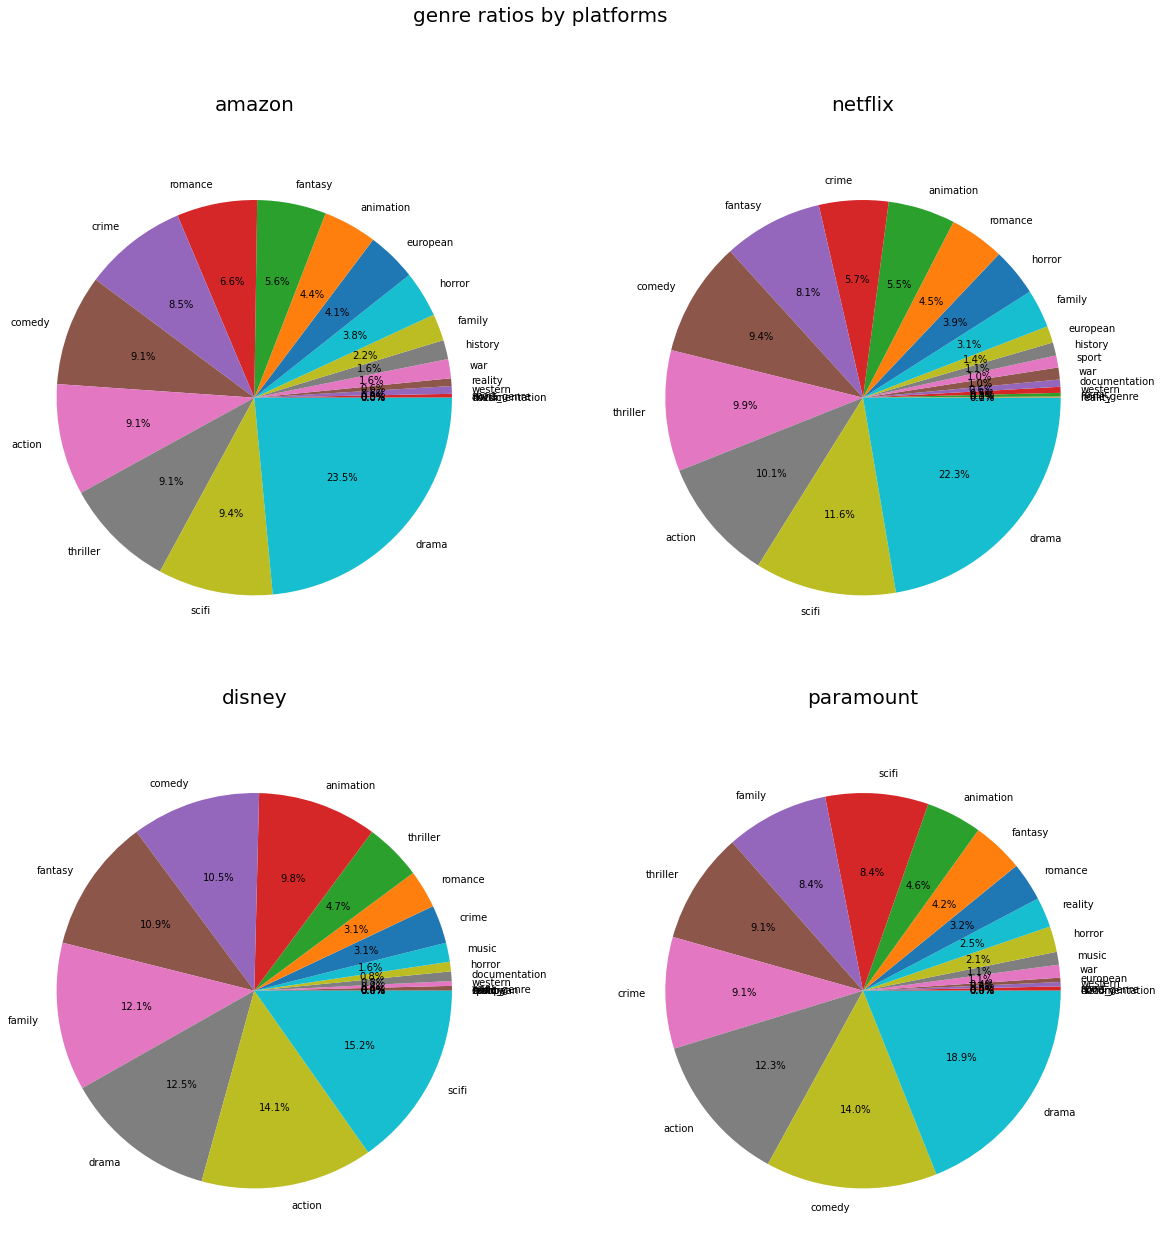

In [45]:
# 장르가 너무 많아서 상위 12개국만 봄
top_rank = 20

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]
    data, labels = make_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('genre ratios by platforms',fontsize=20)
plt.show()

- 샘플 수가 적어서 그렇겠지만 플랫폼 별 선호 장르가 극명하게 드러남.

#### 국가 비율

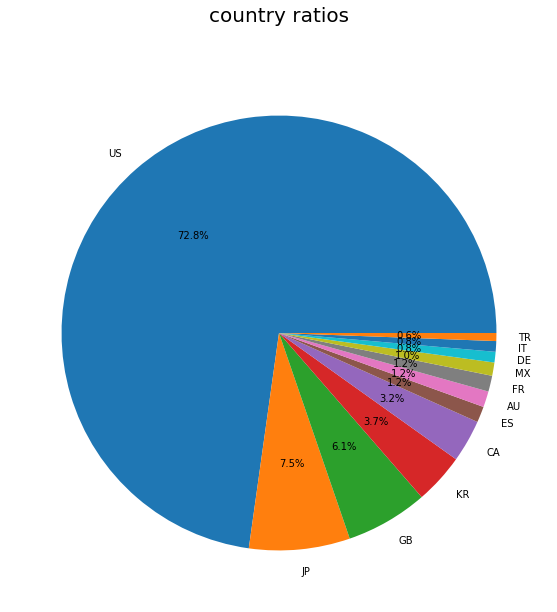

In [32]:
# 나라가 너무 많아서 상위 12개국만 봄
top_rank = 12

plt.figure(figsize=(10, 10))
data, labels = make_country_data_labels(top_rank_show_id_list)

plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
plt.title("country ratios", fontsize=20, pad=40)

plt.show()

- 전체 플랫폼에 대한 국가 비율

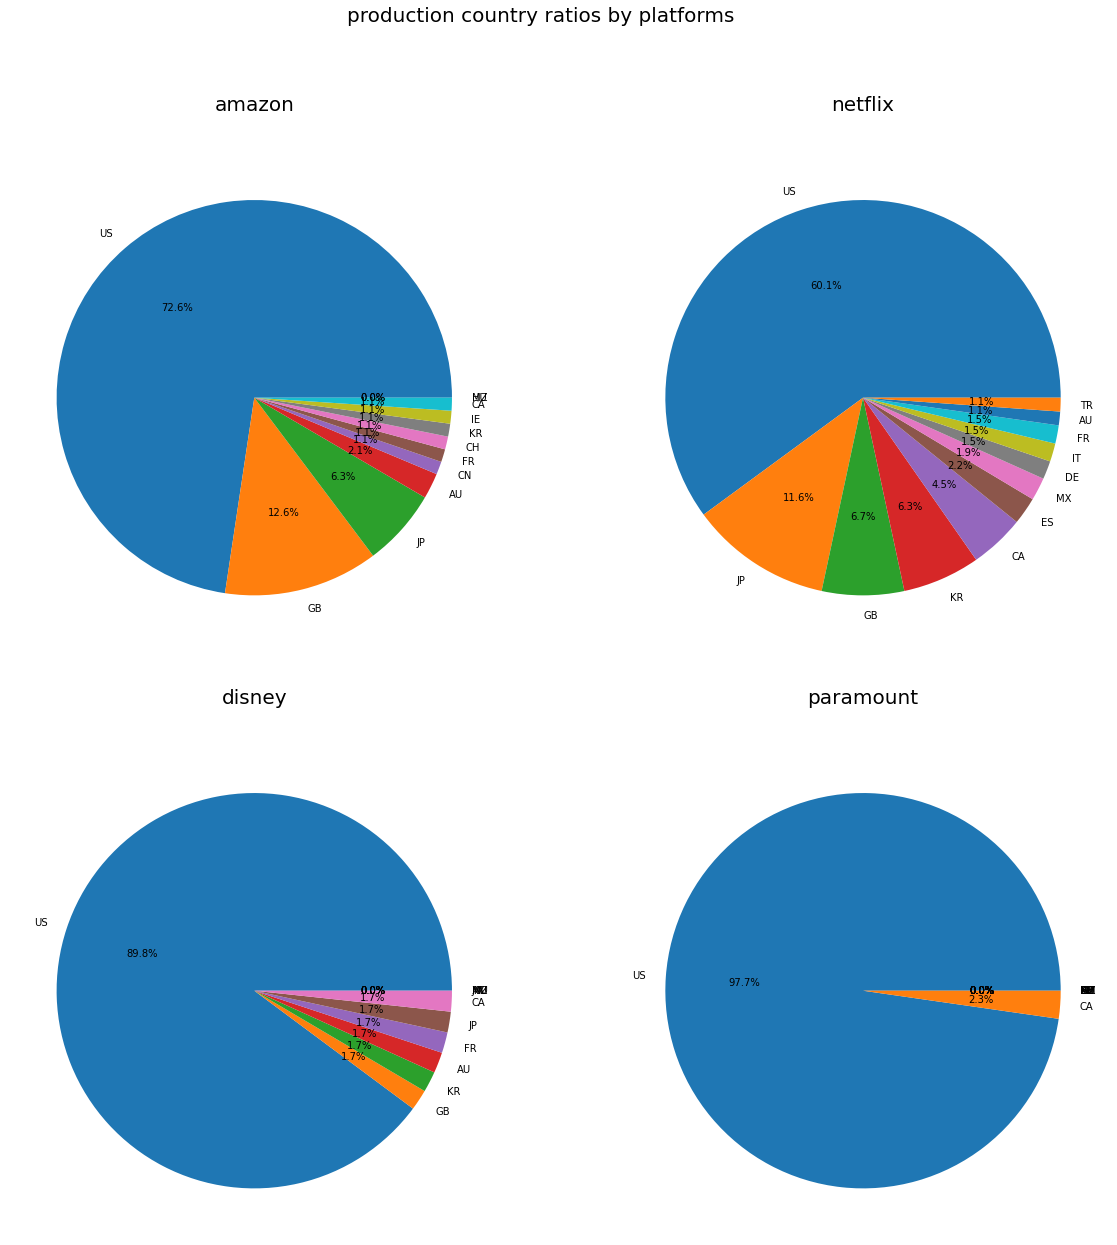

In [33]:
# 나라가 너무 많아서 상위 12개국만 봄
top_rank = 12

plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]
    data, labels = make_country_data_labels(data)

    plt.subplot(2, 2, i+1)
    plt.pie(data[:top_rank], labels=labels[:top_rank], autopct='%0.1f%%')
    plt.title(platform_name, fontsize=20, pad=40)

plt.suptitle('production country ratios by platforms',fontsize=20)
plt.show()

#### 연령 제한

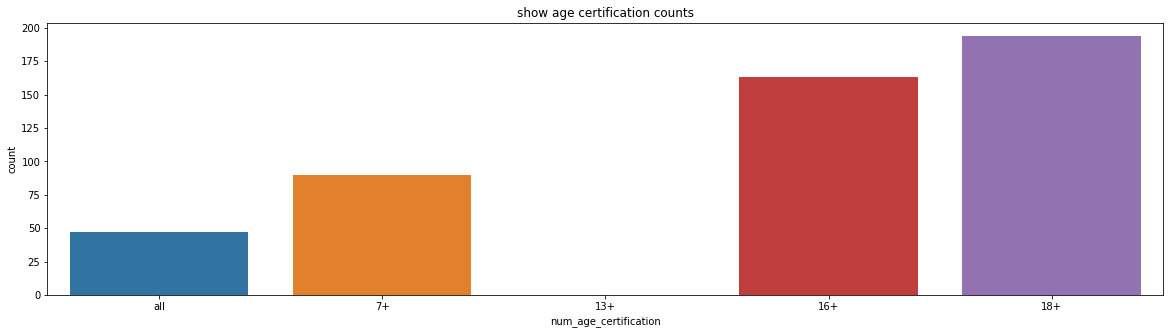

In [34]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 5))
data = top_rank_show_id_list

plt.title("show age certification counts")
sns.countplot(x="num_age_certification", data=data, order=order)

plt.show()

- 전체 플랫폼

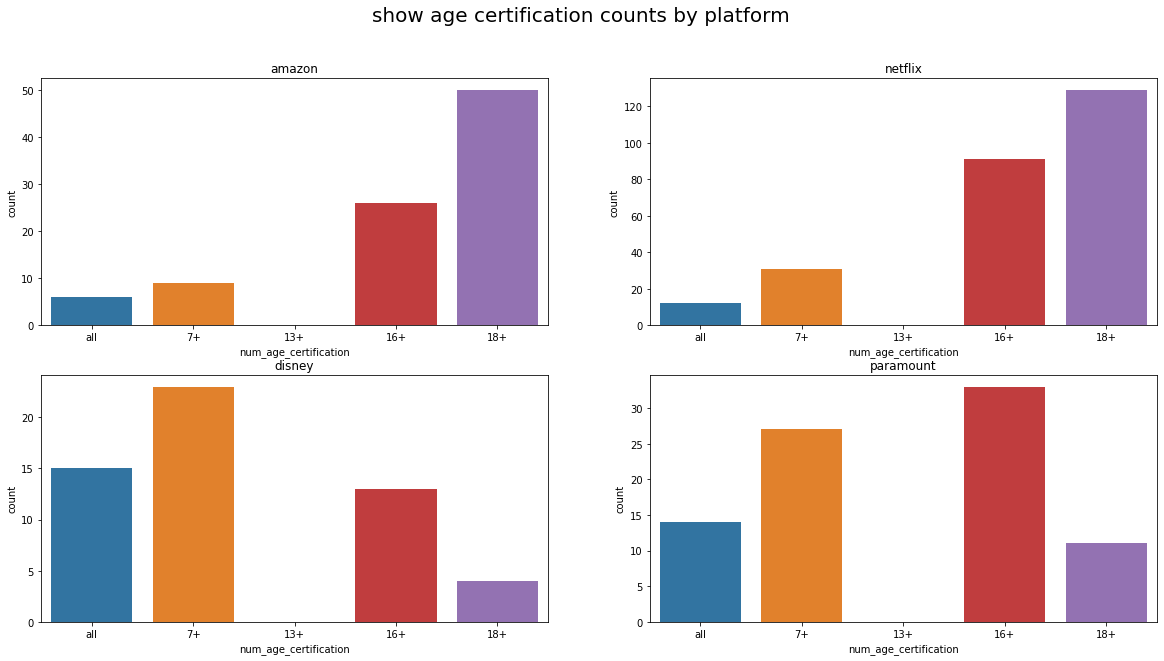

In [35]:
# order = ["all", "7+", "13+", "16+", "18+", "none"]
order = ["all", "7+", "13+", "16+", "18+"]

plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.countplot(x="num_age_certification", data=data, order=order)

plt.suptitle('show age certification counts by platform',fontsize=20)
plt.show()

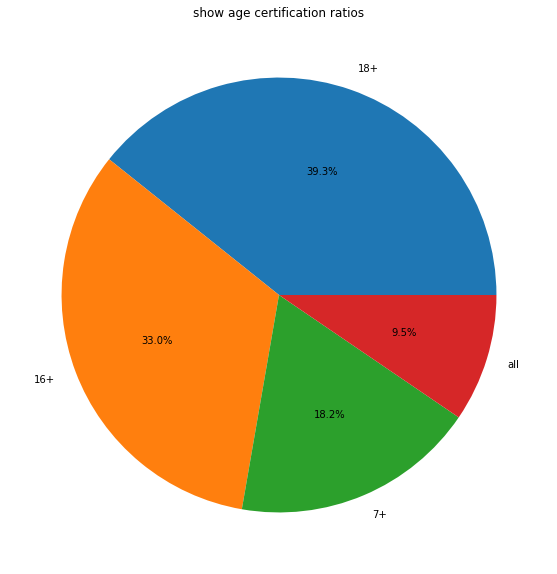

In [36]:
plt.figure(figsize=(10, 10))
data = top_rank_show_id_list
data = data.loc[data["num_age_certification"] != "none"]
labels = data["num_age_certification"].value_counts().index.tolist()
data = data["num_age_certification"].value_counts()

plt.title("show age certification ratios")
plt.pie(data, labels=labels, autopct='%.1f%%')

plt.show()

- 전체

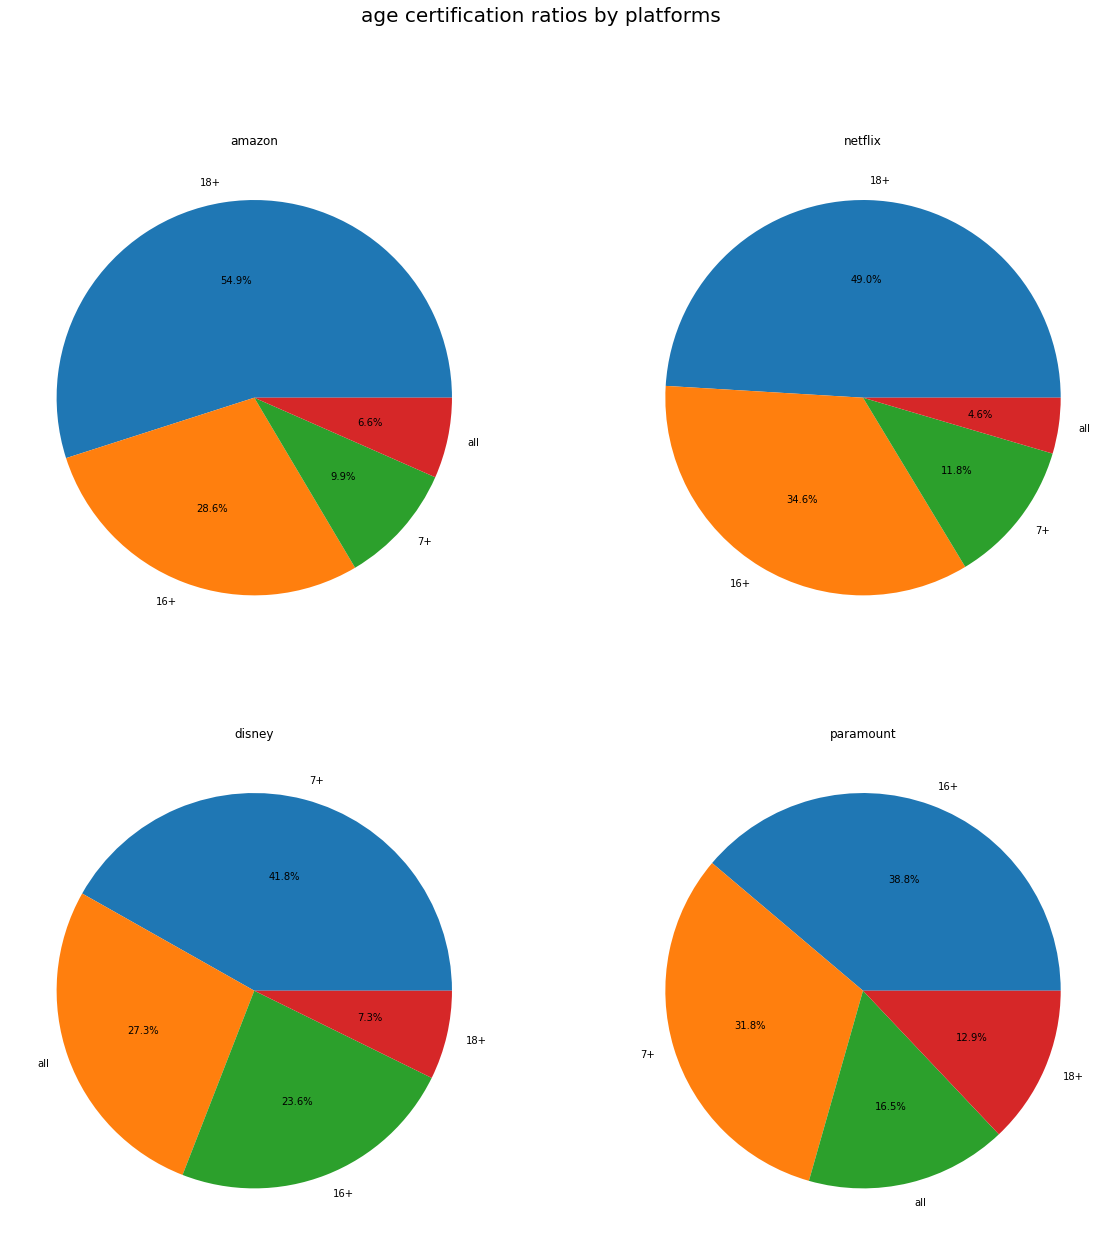

In [37]:
plt.figure(figsize=(20, 20))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]
    data = data.loc[data["num_age_certification"] != "none"]
    labels = data["num_age_certification"].value_counts().index.tolist()
    data = data["num_age_certification"].value_counts()

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    plt.pie(data, labels=labels, autopct='%.1f%%')

plt.suptitle('age certification ratios by platforms',fontsize=20)
plt.show()

#### 상영 시간

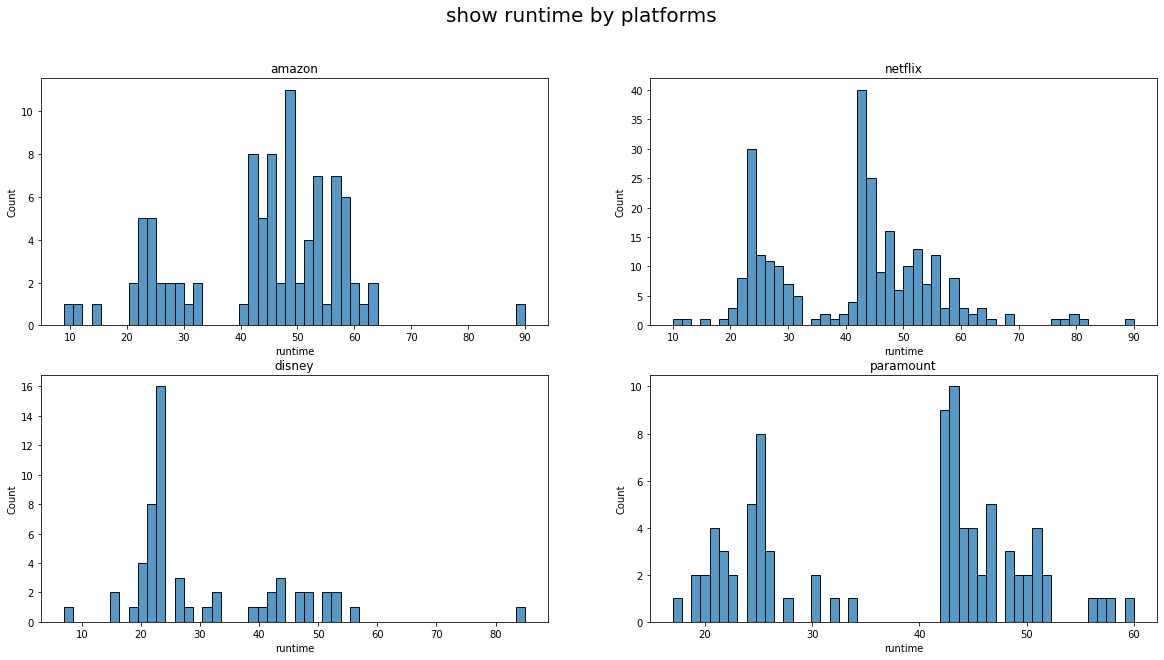

In [38]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=50, kde=False, data=data)

plt.suptitle('show runtime by platforms',fontsize=20)
plt.show()

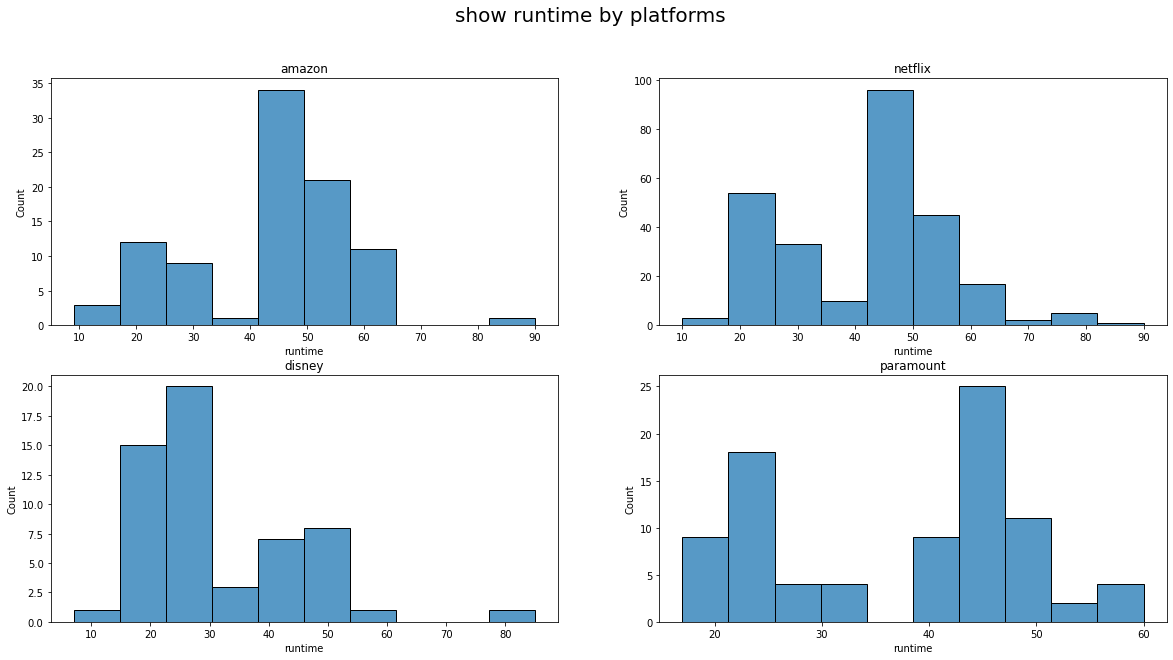

In [39]:
plt.figure(figsize=(20, 10))
for i, platform_name in enumerate(platform_names):
    data = top_rank_show_id_list.loc[top_rank_show_id_list["platform"] == platform_name]

    plt.subplot(2, 2, i+1)
    plt.title(platform_name)
    sns.histplot(x="runtime", bins=10, kde=False, data=data)

plt.suptitle('show runtime by platforms',fontsize=20)
plt.show()

In [40]:

# top_rank_id_list
# top_rank_id_list = top_rank_id_list.drop_duplicates("id")
# top_rank_id_list = movie_tmdb_popularity_sorted_titles.iloc[:, id_index].tolist()
# top_rank_id_list

In [41]:
blank_df = pd.DataFrame(data=[], columns=credits.columns)

top_rank_credits = blank_df
for i, id in enumerate(top_rank_id_list):
    temp_df = credits.loc[credits["id"] == id]
    top_rank_credits = pd.concat([top_rank_credits, temp_df], axis=0)

# top_rank_credits

NameError: ignored

In [ ]:
# 중복 제거 안하면 에러남
top_rank_director_ids = top_rank_credits.loc[top_rank_credits["role"] == "DIRECTOR"]

top_rank_director_ids = top_rank_director_ids["id"].tolist()
# top_rank_director_ids

In [ ]:
blank_df = pd.DataFrame(data=[], columns=credits.columns)


In [ ]:
top_rank_id_list

In [ ]:
release_year_df = pd.DataFrame(data=[], columns=titles.columns)

plt.figure(figsize=(20, 10))
for i, id in enumerate(top_rank_id_list):
    data = titles.loc[titles["id"] == id]
    release_year_df = pd.concat([release_year_df, data], axis=0)

    # plt.subplot(2, 2, i+1)
    # plt.title(platform_name)
    # plt.barplot()
    sns.histplot(x="release_year", bins=50, kde=False, data=release_year_df)

plt.suptitle('release_year by platforms',fontsize=20)
plt.show()

# 5. 인기도/점수 기준 특정 % 상위의 영화/드라마의 장르 개수 분포 

### 플랫폼 별 인기도 및 점수 분포도 확인

In [ ]:
platform_names

In [ ]:
titles.loc[titles["platform"] == platform_names[0]].describe()

In [ ]:
titles.loc[titles["platform"] == platform_names[1]].describe()

In [ ]:
titles.loc[titles["platform"] == platform_names[2]].describe()

In [ ]:
titles.loc[titles["platform"] == platform_names[3]].describe()

- IMDB 및 TMDB는 OTT 플랫폼과 독립적인 사이트이기 때문에 플랫폼 별로 약간 차이는 있으나 플랫폼에 상관없이 동일한 기준을 잡아도 무방하다고 생각함.
- 플랫폼에 상관없이 기준은 아래와 같음
- 25%
  - imdb_score : 5
  - imdb_votes : 150
  - tmdb_popularity : 1.4
  - tmdb_score : 5
- 50%
  - imdb_score : 6
  - imdb_votes : 500
  - tmdb_popularity : 2.7
  - tmdb_score : 6
- 75%
  - imdb_score : 7
  - imdb_votes : 2000
  - tmdb_popularity : 6
  - tmdb_score : 7


In [ ]:
# 판단의 기준 설정
standard = "imdb_score"
threshold = 5

data = titles.loc[titles[standard] >= threshold]

# 시각화
sns.countplot(x="genres", hue="platform", data=data)

# 9. 다작을 한 배우/감독은 흥했는지? 망했는지?

In [ ]:
credits

In [ ]:
director_df = credits.loc[credits["role"] == "DIRECTOR"]
director_df2 = director_df["person_id"].value_counts()
id_list = director_df2.index.tolist()

director_df3 = pd.DataFrame(columns=credits.columns)
for id in id_list[:10]:
    print(id)
    print((director_df.loc[director_df["person_id"] == id]))

In [ ]:
n1 = credits.loc[credits["person_id"] == 151608]

In [ ]:
for id in n1["id"]:
    print(titles.loc[titles["id"] == id])

각 플랫폼에 동시 연재하고 있는 작품의 수도 알 수 있구나